In [1]:
import numpy as np
import matplotlib.pyplot as plt
import apogee.tools.read as apread
import apogee.spec.plot as splot
import tensorflow as tf
import itertools
from tqdm import tqdm
try:
    from sewingmachine import equivalentwidths, linelist

except NameError:
    reload(equivalentwidths)

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

/home/astjmack/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters



Re-fitting continuum after sigma clipping...


(0.15623079470218237, 0.019354601913129797)

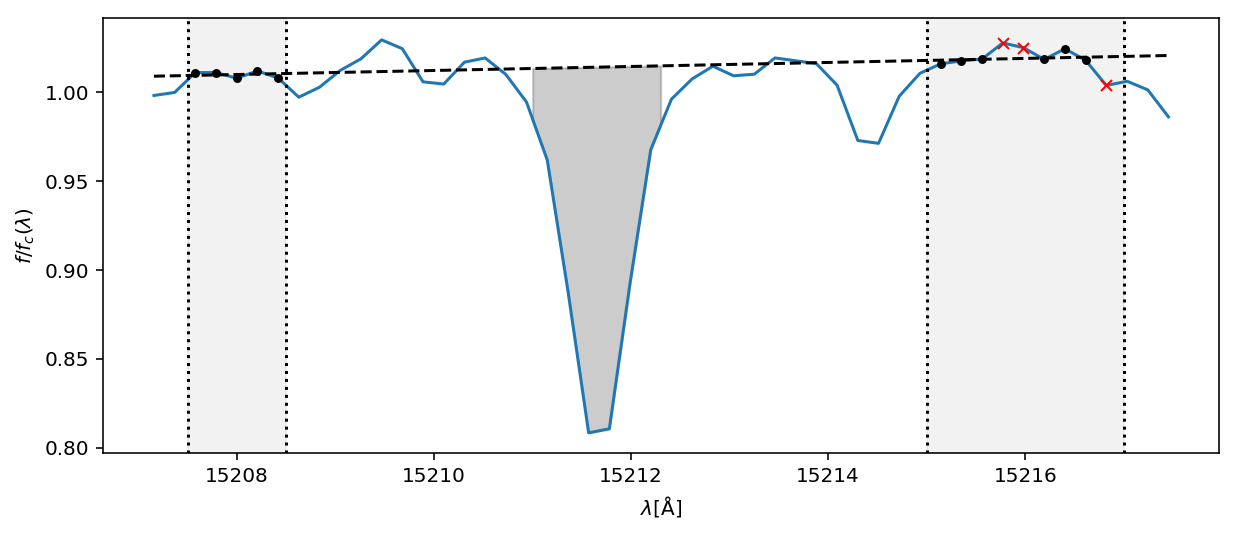

In [2]:
lams= splot.apStarWavegrid()
inds = (lams > 15206) & (lams < 15218)
spec, hdr = apread.aspcapStar(4120, '2M00221738+6957505', ext=1)
errspec, hdr = apread.aspcapStar(4120, '2M00221738+6957505', ext=2)
spectrum = np.dstack([lams,spec,errspec])[0]

fig = plt.figure()
fig.set_size_inches(10,4)
integration = [15211, 15212.3]
windows = [[15207.5,15208.5], [15215,15217]]

equivalentwidths.trapz_ew(spectrum, integration, windows, plot=True, sigma=1., verbose=True, error=True)

In [3]:
%timeit -n 100 equivalentwidths.trapz_ew(spectrum, integration, windows, plot=False, sigma=1, error=True)

100 loops, best of 3: 1.75 ms per loop


In [4]:
lines = linelist.Linelist('linelists/linelist.txt')

sewingmachine/linelist.py:26: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  linelist =np.genfromtxt(file, dtype=None, names=True)



In [5]:
ews, errs, flags = equivalentwidths.measurelinelist(spectrum, lines, sigma = 2, plot=True, return_flags=True, error=True)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [6]:
print ews
print errs
print flags

[ 0.10850065  0.13411256  0.03063063  0.06752875  0.14188378  0.06071425
  0.27095986  0.33291334  0.13651847  0.42701866  0.57111331  0.07170446
  0.1369376   0.09464603  0.16105109  0.98677788  0.09102054  0.0152286
 -0.00361686  0.64372817  0.01567351  0.01370831  0.01001141  0.01146276
 -0.00262486  0.03090243  0.01604876  1.35481682  0.16555933  0.01689191
  0.06834965  0.0102549   0.00339493  0.33206328 -0.01051832  0.08156849
  0.0212991   1.22841527  0.06410853  0.06633442  0.50130736  0.06968098
  0.04406512  0.03321905  0.08590026  0.07721854  0.03250922  0.15400749
  0.00464208         nan]
[2.09607779e-02 3.98450875e-02 1.75392451e-02 2.13436564e-02
 4.45861630e-02 4.96147512e-02 2.66616658e-02 2.50712660e-02
 2.37265091e+01 2.96139407e-02 2.86756314e-02 1.58804140e-02
 1.96705751e-02 1.95085223e-02 2.51488850e-02 1.58540593e+02
 1.68767808e-02 2.20111431e-02 1.84699362e-02 1.08544849e+02
 2.86426052e-02 2.27331794e-02 2.37390605e-02 1.70406873e-02
 3.65321874e-02 2.0061872

Re-fitting continuum after sigma clipping...


(0.13447164215117735, 23.726509115922568, 0)

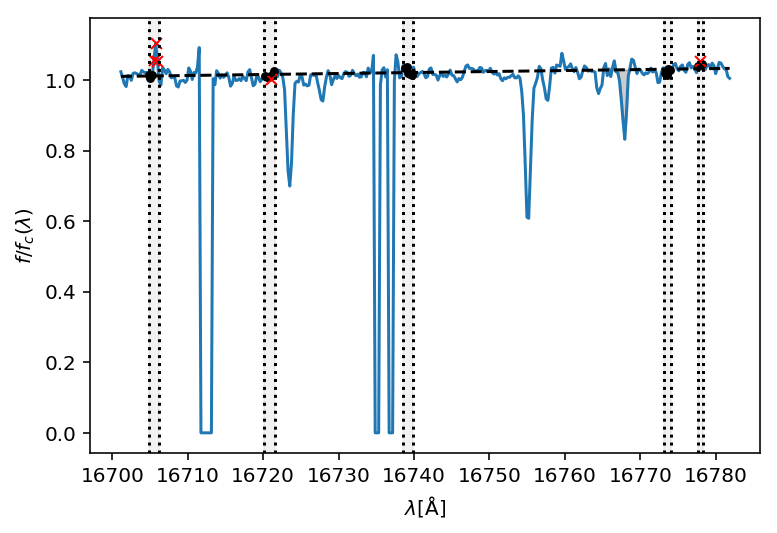

In [46]:
equivalentwidths.trapz_ew(spectrum, lines.integration[8], lines.windows[8], plot=True, sigma=1, verbose=True, return_flags = True, error=True)

In [7]:
allStar = apread.allStar()

In [9]:
specs = np.empty([100,len(lams)])
errspecs = np.empty([100,len(lams)])
for i in tqdm(range(100)):
    specs[i], hdr = apread.aspcapStar(allStar['LOCATION_ID'][i], allStar['APOGEE_ID'][i], ext=1)
    errspecs[i], hdr = apread.aspcapStar(allStar['LOCATION_ID'][i], allStar['APOGEE_ID'][i], ext=2)
    

100%|██████████| 100/100 [00:00<00:00, 119.51it/s]


In [4]:
%%timeit
ews = np.empty([100,len(lines.labels)])
errs = np.empty([100,len(lines.labels)])
flags = []
for i in tqdm(range(100)):
    spectrum = np.dstack([lams, specs[i], errspecs[i]])[0]
    ews[i], errs[i], flagsi = equivalentwidths.measurelinelist(spectrum, lines, sigma = 2, return_flags=True, error=True)
    flags.append(flagsi)

NameError: global name 'lines' is not defined

In [50]:
import os
os.getenv('SDSS_LOCAL_SAS_MIRROR')

'/gal/sdss_lsm'

In [ ]:
try:
    reload(measure_apogee)
except NameError:
    import measure_apogee
lines = linelist.Linelist('linelists/linelist.txt')
#allStarmask = (allStar['GLON'] > 0.) & (allStar['GLON'] < 45.) & (allStar['GLAT'] > 20) & (allStar['VHELIO_AVG'] < 150) & (allStar['VHELIO_AVG'] > -90) & (allStar['EXTRATARG'] == 0)
test_allstar = allStar

ews, errs, flags = measure_apogee.measure_apogee(test_allstar, 'linelists/linelist.txt', return_flags=True)



  0%|          | 164/266094 [00:15<6:16:25, 11.77it/s] 

sewingmachine/equivalentwidths.py:207: RuntimeWarning: divide by zero encountered in divide
  nline_y = line_y/cont_y



  0%|          | 272/266094 [00:24<6:07:56, 12.04it/s]

sewingmachine/equivalentwidths.py:207: RuntimeWarning: invalid value encountered in divide
  nline_y = line_y/cont_y



  1%|          | 1435/266094 [02:04<5:30:04, 13.36it/s]

Spectrum missing from SAS?


  1%|          | 1688/266094 [02:25<5:31:56, 13.28it/s]

Spectrum missing from SAS?


  1%|          | 1811/266094 [02:36<5:53:52, 12.45it/s]

Spectrum missing from SAS?


  1%|          | 2016/266094 [02:54<5:40:21, 12.93it/s]

Spectrum missing from SAS?


  1%|          | 2504/266094 [03:44<5:27:44, 13.40it/s] 

Spectrum missing from SAS?


  1%|          | 2723/266094 [04:03<5:36:44, 13.04it/s]

Spectrum missing from SAS?


  1%|          | 2862/266094 [04:14<5:32:11, 13.21it/s]

Spectrum missing from SAS?


  1%|          | 2880/266094 [04:16<5:42:12, 12.82it/s]

Spectrum missing from SAS?


  1%|          | 3181/266094 [04:42<5:25:53, 13.45it/s]

Spectrum missing from SAS?


  2%|▏         | 4151/266094 [06:07<5:35:10, 13.03it/s] 

Spectrum missing from SAS?


  2%|▏         | 5105/266094 [07:30<5:44:44, 12.62it/s]

Spectrum missing from SAS?


  2%|▏         | 5764/266094 [08:27<5:39:04, 12.80it/s]

Spectrum missing from SAS?


  2%|▏         | 5795/266094 [08:29<5:47:47, 12.47it/s]

Spectrum missing from SAS?


  2%|▏         | 6065/266094 [08:52<5:52:02, 12.31it/s]

Spectrum missing from SAS?


  3%|▎         | 7779/266094 [11:38<5:36:19, 12.80it/s] 

Spectrum missing from SAS?


  3%|▎         | 8204/266094 [12:15<5:20:23, 13.42it/s]

Spectrum missing from SAS?


  3%|▎         | 8277/266094 [12:21<5:19:19, 13.46it/s]

Spectrum missing from SAS?


  3%|▎         | 8298/266094 [12:23<5:29:28, 13.04it/s]

Spectrum missing from SAS?


  3%|▎         | 8393/266094 [12:31<5:35:18, 12.81it/s]

Spectrum missing from SAS?
Spectrum missing from SAS?


  3%|▎         | 8415/266094 [12:33<5:46:33, 12.39it/s]

Spectrum missing from SAS?


  3%|▎         | 8456/266094 [12:36<5:50:38, 12.25it/s]

Spectrum missing from SAS?


  3%|▎         | 8816/266094 [13:08<5:43:45, 12.47it/s]

Spectrum missing from SAS?


  3%|▎         | 8833/266094 [13:09<5:17:57, 13.49it/s]

Spectrum missing from SAS?


  4%|▎         | 9474/266094 [14:04<5:39:32, 12.60it/s] 

Spectrum missing from SAS?


  4%|▎         | 9619/266094 [14:16<5:15:41, 13.54it/s]

Spectrum missing from SAS?


  4%|▎         | 9680/266094 [14:21<5:21:15, 13.30it/s]

Spectrum missing from SAS?


  4%|▍         | 10577/266094 [15:37<5:17:43, 13.40it/s]

Spectrum missing from SAS?


  4%|▍         | 10644/266094 [15:43<5:29:55, 12.90it/s]

Spectrum missing from SAS?


  4%|▍         | 10943/266094 [16:08<5:22:20, 13.19it/s]

Spectrum missing from SAS?


  4%|▍         | 10986/266094 [16:12<5:20:12, 13.28it/s]

Spectrum missing from SAS?


  4%|▍         | 11230/266094 [16:33<5:24:01, 13.11it/s]

Spectrum missing from SAS?


  4%|▍         | 11927/266094 [17:32<5:20:33, 13.21it/s]

Spectrum missing from SAS?


  5%|▍         | 12060/266094 [17:44<5:31:53, 12.76it/s]

Spectrum missing from SAS?


  5%|▍         | 12242/266094 [18:00<5:53:17, 11.98it/s]

Spectrum missing from SAS?


  5%|▍         | 12267/266094 [18:02<5:24:29, 13.04it/s]

Spectrum missing from SAS?


  5%|▍         | 12406/266094 [18:14<5:23:07, 13.09it/s]

Spectrum missing from SAS?


  5%|▌         | 13386/266094 [19:41<5:52:23, 11.95it/s] 

Spectrum missing from SAS?


  5%|▌         | 14185/266094 [20:52<5:16:51, 13.25it/s]

Spectrum missing from SAS?


  5%|▌         | 14212/266094 [20:54<5:23:14, 12.99it/s]

Spectrum missing from SAS?


  5%|▌         | 14247/266094 [20:57<5:25:26, 12.90it/s]

Spectrum missing from SAS?


  6%|▌         | 14673/266094 [21:34<5:19:12, 13.13it/s]

Spectrum missing from SAS?


  6%|▌         | 15576/266094 [22:51<5:54:39, 11.77it/s]

Spectrum missing from SAS?


  6%|▌         | 15592/266094 [22:53<5:15:09, 13.25it/s]

Spectrum missing from SAS?


  6%|▌         | 15719/266094 [23:03<5:18:15, 13.11it/s]

Spectrum missing from SAS?


  6%|▌         | 15858/266094 [23:30<5:15:31, 13.22it/s] 

Spectrum missing from SAS?


  6%|▌         | 16055/266094 [23:47<5:08:11, 13.52it/s]

Spectrum missing from SAS?


  6%|▌         | 16316/266094 [24:10<5:37:08, 12.35it/s]

Spectrum missing from SAS?


  6%|▋         | 16703/266094 [24:43<5:13:47, 13.25it/s]

Spectrum missing from SAS?


  6%|▋         | 16752/266094 [24:47<5:33:44, 12.45it/s]

Spectrum missing from SAS?


  6%|▋         | 16815/266094 [24:52<5:13:09, 13.27it/s]

Spectrum missing from SAS?


  6%|▋         | 16870/266094 [24:57<5:15:51, 13.15it/s]

Spectrum missing from SAS?


  6%|▋         | 16983/266094 [25:06<5:28:40, 12.63it/s]

Spectrum missing from SAS?


  7%|▋         | 17619/266094 [26:05<5:11:49, 13.28it/s] 

Spectrum missing from SAS?


  7%|▋         | 17626/266094 [26:05<4:55:38, 14.01it/s]

Spectrum missing from SAS?


  7%|▋         | 17651/266094 [26:07<5:06:07, 13.53it/s]

Spectrum missing from SAS?


  7%|▋         | 17796/266094 [26:19<5:24:36, 12.75it/s]

Spectrum missing from SAS?


  7%|▋         | 17819/266094 [26:21<5:10:07, 13.34it/s]

Spectrum missing from SAS?


  7%|▋         | 18142/266094 [26:49<5:20:08, 12.91it/s]

Spectrum missing from SAS?


  7%|▋         | 18265/266094 [26:59<5:20:37, 12.88it/s]

Spectrum missing from SAS?


  7%|▋         | 18826/266094 [27:47<5:03:52, 13.56it/s]

Spectrum missing from SAS?


  7%|▋         | 19773/266094 [29:20<5:14:47, 13.04it/s] 

Spectrum missing from SAS?


  8%|▊         | 20454/266094 [30:18<5:18:16, 12.86it/s]

Spectrum missing from SAS?


  8%|▊         | 20836/266094 [30:50<5:02:24, 13.52it/s]

Spectrum missing from SAS?
Spectrum missing from SAS?


  8%|▊         | 21273/266094 [31:33<5:08:34, 13.22it/s] 

Spectrum missing from SAS?


  8%|▊         | 21493/266094 [31:53<5:10:43, 13.12it/s]

Spectrum missing from SAS?


  9%|▊         | 22638/266094 [33:47<5:16:01, 12.84it/s] 

Spectrum missing from SAS?


  9%|▊         | 22985/266094 [34:17<5:18:00, 12.74it/s]

Spectrum missing from SAS?


  9%|▊         | 23094/266094 [34:28<6:06:12, 11.06it/s]

Spectrum missing from SAS?


  9%|▉         | 23516/266094 [35:08<6:00:45, 11.21it/s] 

In [52]:
len(ews)

266094

Al_16767


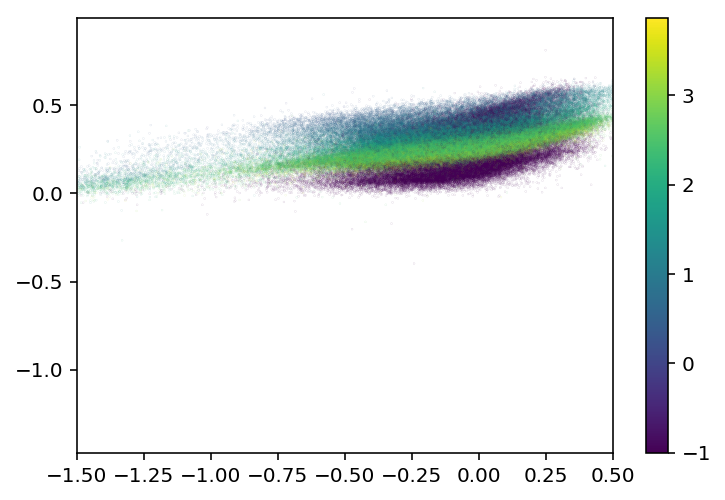

In [53]:
line_i = 8
print lines.labels[line_i]
badflag = (np.bitwise_and(flags[:,line_i], 2**4) == 0)
plt.scatter( test_allstar['FE_H'][badflag],ews[:,line_i][badflag], c= test_allstar['LOGG'][badflag], s=0.001, vmin=-1.)
plt.xlim(-1.5,0.5)

plt.colorbar()

In [54]:
lab = [('APOGEE_ID', str, 18),]
for i in range(len(lines.labels)):
    lab.append((lines.labels[i]+'_EW', np.float32))
    lab.append((lines.labels[i]+'_ERR', np.float32))
    lab.append((lines.labels[i]+'_FLAG', np.int32))

In [55]:
rec = np.recarray(len(ews), dtype=lab)

In [56]:
rec['APOGEE_ID'] = allStar['APOGEE_ID']
for i in range(len(lines.labels)):
    keys = [lines.labels[i]+'_EW', lines.labels[i]+'_EW', lines.labels[i]+'_FLAGS']
    rec[lines.labels[i]+'_EW'] = ews[:,i]
    rec[lines.labels[i]+'_ERR'] = errs[:,i]
    rec[lines.labels[i]+'_FLAG'] = flags[:,i]


In [58]:
hdu = fits.BinTableHDU.from_columns(rec)
hdu.writeto('APOGEE_DR14_ews.fits')

In [8]:
from astropy.io import fits
from astropy.table import Table, join

In [9]:
ewtable = fits.open('APOGEE_DR14_ews.fits')

In [10]:
ewtable[1].data.dtype.fields

dict_proxy({'APOGEE_ID': (dtype('S18'), 0),
            'Al_16723_ERR': (dtype('>f4'), 94),
            'Al_16723_EW': (dtype('>f4'), 90),
            'Al_16723_FLAG': (dtype('>i4'), 98),
            'Al_16755_ERR': (dtype('>f4'), 106),
            'Al_16755_EW': (dtype('>f4'), 102),
            'Al_16755_FLAG': (dtype('>i4'), 110),
            'Al_16767_ERR': (dtype('>f4'), 118),
            'Al_16767_EW': (dtype('>f4'), 114),
            'Al_16767_FLAG': (dtype('>i4'), 122),
            'CI_16009_ERR': (dtype('>f4'), 550),
            'CI_16009_EW': (dtype('>f4'), 546),
            'CI_16009_FLAG': (dtype('>i4'), 554),
            'CI_16026_ERR': (dtype('>f4'), 562),
            'CI_16026_EW': (dtype('>f4'), 558),
            'CI_16026_FLAG': (dtype('>i4'), 566),
            'CI_16859_ERR': (dtype('>f4'), 574),
            'CI_16859_EW': (dtype('>f4'), 570),
            'CI_16859_FLAG': (dtype('>i4'), 578),
            'CI_16895_ERR': (dtype('>f4'), 586),
            'CI_16895_EW': (

In [15]:
badmask = np.ones(len(ewtable[1].data), dtype=bool)
for i in range(30):
    key = lines.labels[i]+'_FLAG'
    ewkey = lines.labels[i]+'_EW'
    print key
    badmask = badmask*(np.bitwise_and(ewtable[1].data[key], 2**4) == 0)
    badmask = badmask*np.isfinite(ewtable[1].data[ewkey])
badmask = badmask*(allStar['TEFF'] != -9999.)
badmask = badmask*(allStar['LOGG'] != -9999.)
badmask = badmask*(allStar['FE_H'] != -9999.)
badmask = badmask*(allStar['C_FE'] != -9999.)
badmask = badmask*(allStar['N_FE'] != -9999.)
badmask = badmask*(allStar['O_FE'] != -9999.)
print len(ewtable[1].data[badmask])

FeI_16045_FLAG
FeI_16895_FLAG
FeI_15490_FLAG
FeI_15494_FLAG
OH_16369_FLAG
CN_16388_FLAG
Al_16723_FLAG
Al_16755_FLAG
Al_16767_FLAG
MgI_15753_FLAG
MgI_15770_FLAG
MgI_15917_FLAG
MgI_15959_FLAG
FeI_16230_FLAG
FeI_16522_FLAG
FeI_15399_FLAG
FeI_15969_FLAG
OH_15395_FLAG
OH_15413_FLAG
OH_15573_FLAG
OH_15576_FLAG
OH_15724_FLAG
OH_15761_FLAG
OH_16057_FLAG
OH_16877_FLAG
OH_16709_FLAG
OH_16719_FLAG
CO_16190_FLAG
CO_16620_FLAG
CO_15582_FLAG
58333


In [16]:
len(ewtable[1].data[badmask])

58333

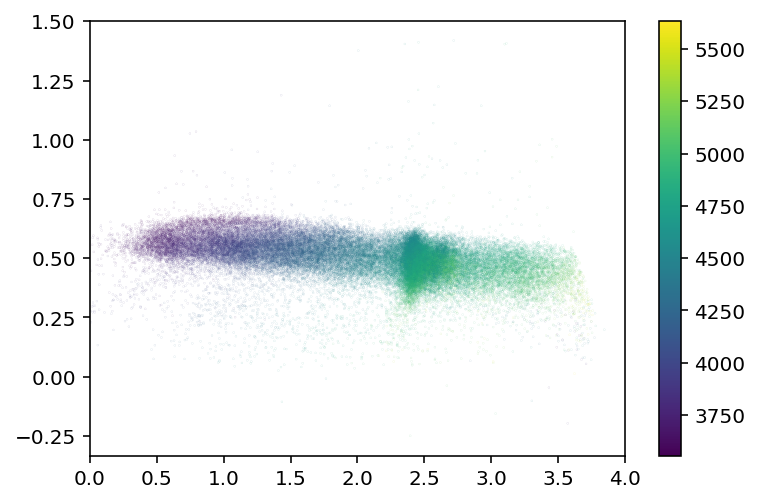

In [17]:
plt.scatter(allStar['LOGG'][badmask], ewtable[1].data['CO_16386_EW'][badmask], s=0.001, c=allStar['TEFF'][badmask])
plt.xlim(0,4.)
plt.colorbar()

In [18]:
featurelist = [key+'_EW' for key in lines.labels[:11]]

snrs = allStar['SNR'][badmask]
labels = np.dstack([allStar['TEFF'], allStar['FE_H']])[0]
features = np.dstack([ewtable[1].data[key+'_EW'] for key in lines.labels[:30]])[0]

features = features[badmask]
train_features = features[snrs > 500]
test_features = features[snrs <= 500]

labels = labels[badmask]
train_labels = labels[snrs > 500]
test_labels = labels[snrs <= 500]



In [19]:
train_featuredict = {}
test_featuredict = {}
for i in range(len(lines.labels[:30])):
    train_featuredict[lines.labels[i]] = train_features[:,i]
    test_featuredict[lines.labels[i]] = test_features[:,i]

In [20]:
try:
    del train_dataset, test_dataset, model
    train_dataset = tf.data.Dataset.from_tensor_slices((train_featuredict, train_labels))
    test_dataset = tf.data.Dataset.from_tensor_slices((test_featuredict, test_labels))
except NameError:
    train_dataset = tf.data.Dataset.from_tensor_slices((train_featuredict, train_labels))
    test_dataset = tf.data.Dataset.from_tensor_slices((test_featuredict, test_labels))

In [42]:
def train_input_fn():
    """An input function for training"""
    # Shuffle, repeat, and batch the examples.
    dataset = train_dataset.shuffle(40000).repeat().batch(500)
    # Build the Iterator, and return the read end of the pipeline.
    return dataset.make_one_shot_iterator().get_next()

def eval_input_fn():
    return (test_dataset.shuffle(1000).batch(128)
            .make_one_shot_iterator().get_next())


my_feature_columns = []
for key in lines.labels[:30]:
    my_feature_columns.append(tf.feature_column.numeric_column(key=key))

In [43]:
try:
    del model
    model = tf.estimator.DNNRegressor(feature_columns=my_feature_columns, hidden_units=[40,20,20], label_dimension=2)
except NameError:
    model = tf.estimator.DNNRegressor(feature_columns=my_feature_columns, hidden_units=[40,20,20], label_dimension=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_task_type': 'worker', '_is_chief': True, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x2af9babfadd0>, '_save_checkpoints_steps': None, '_keep_checkpoint_every_n_hours': 10000, '_service': None, '_num_ps_replicas': 0, '_tf_random_seed': None, '_master': '', '_num_worker_replicas': 1, '_task_id': 0, '_log_step_count_steps': 100, '_model_dir': '/tmp/tmpLcowNv', '_save_summary_steps': 100}


In [44]:
model.train(input_fn=train_input_fn, steps = 8000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmpLcowNv/model.ckpt.
INFO:tensorflow:loss = 9415605000.0, step = 1
INFO:tensorflow:global_step/sec: 57.7274
INFO:tensorflow:loss = 741126460.0, step = 101 (1.734 sec)
INFO:tensorflow:global_step/sec: 63.0676
INFO:tensorflow:loss = 240951700.0, step = 201 (1.586 sec)
INFO:tensorflow:global_step/sec: 58.98
INFO:tensorflow:loss = 141672780.0, step = 301 (1.694 sec)
INFO:tensorflow:global_step/sec: 57.9688
INFO:tensorflow:loss = 105745840.0, step = 401 (1.725 sec)
INFO:tensorflow:global_step/sec: 58.438
INFO:tensorflow:loss = 108701976.0, step = 501 (1.711 sec)
INFO:tensorflow:global_step/sec: 57.6108
INFO:tensorflow:loss = 79200580.0, step = 601 (1.736 sec)
INFO:tensorflow:global_step/sec: 62.6327
INFO:tensorflow:loss = 77497896.0, step = 701 (1.600 sec)
INFO:tensorflow:global_step/sec: 53.4632
INFO:tensorflow:loss = 46970570.0, step = 801 (1.870 sec)
INFO:tensorflow:global_step/sec: 51.6866
IN

In [45]:
result = model.evaluate(input_fn=eval_input_fn)

INFO:tensorflow:Starting evaluation at 2018-02-13-09:52:05
INFO:tensorflow:Restoring parameters from /tmp/tmpLcowNv/model.ckpt-8000
INFO:tensorflow:Finished evaluation at 2018-02-13-09:52:07
INFO:tensorflow:Saving dict for global step 8000: average_loss = 6273.442, global_step = 8000, loss = 1604441.6


In [46]:
result

{'average_loss': 6273.442, 'global_step': 8000, 'loss': 1604441.6}

In [47]:
def pred_input_fn():
    return tf.data.Dataset.from_tensor_slices((test_featuredict, test_labels)).batch(len(test_labels))


pred = model.predict(input_fn=pred_input_fn)

In [48]:
predictions = list(itertools.islice(pred,len(test_labels)))

INFO:tensorflow:Restoring parameters from /tmp/tmpLcowNv/model.ckpt-8000


In [49]:
predictions = np.array([predictions[i]['predictions'] for i in range(len(predictions))])

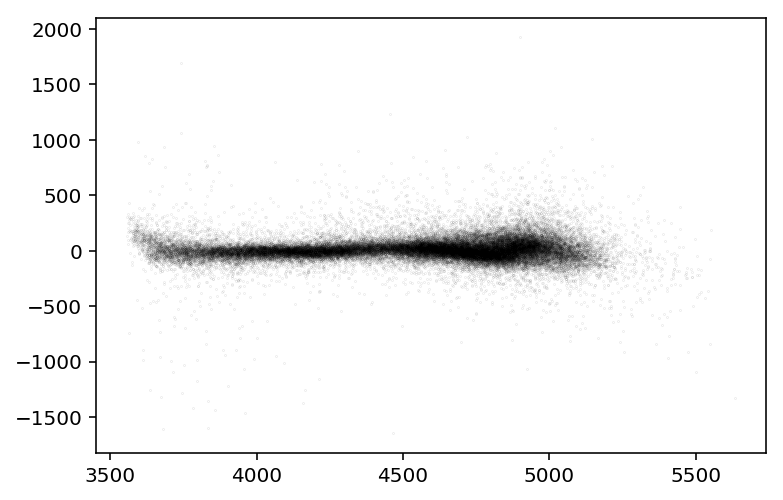

In [50]:
plt.scatter(test_labels[:,0], predictions[:,0]-test_labels[:,0], c='Black', s=0.001)

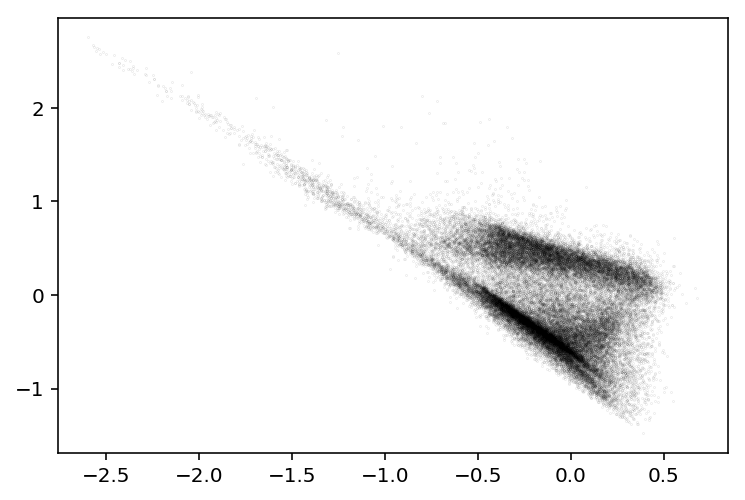

In [51]:
plt.scatter(test_labels[:,1], predictions[:,1]-test_labels[:,1], c='Black', s=0.001)

(6000, 2000)

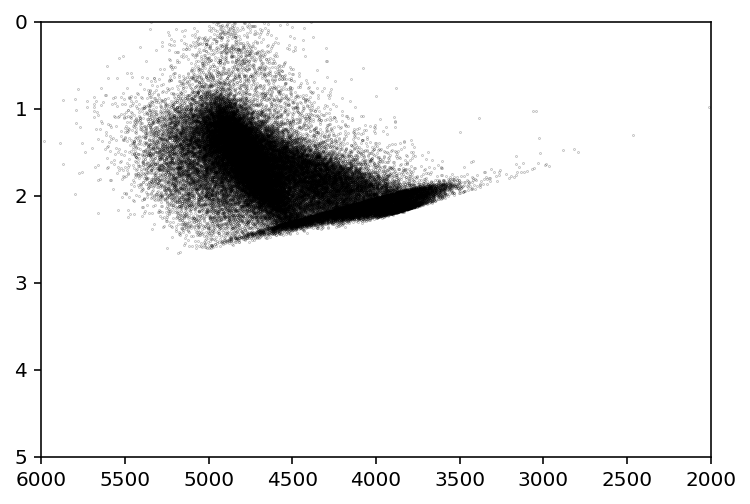

In [27]:
plt.scatter(predictions[:,0], predictions[:,2], s=0.01, c='Black')
plt.ylim(5,0)
plt.xlim(6000, 2000)

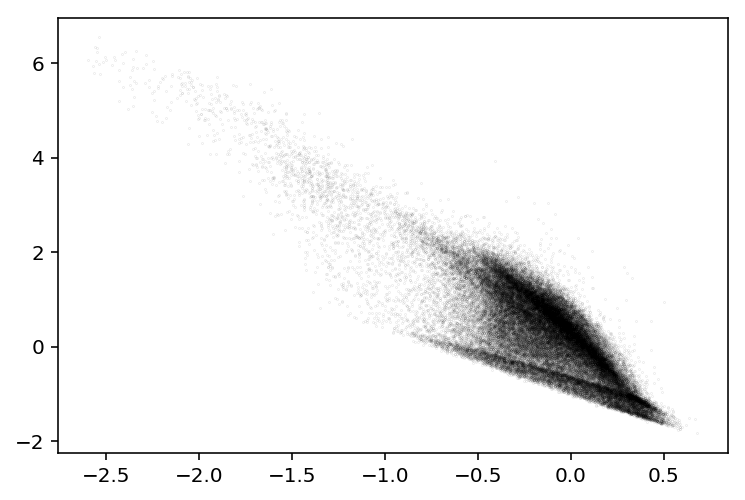

In [30]:
plt.scatter(test_labels[:,1], predictions[:,1]-test_labels[:,1], c='Black', s=0.001)

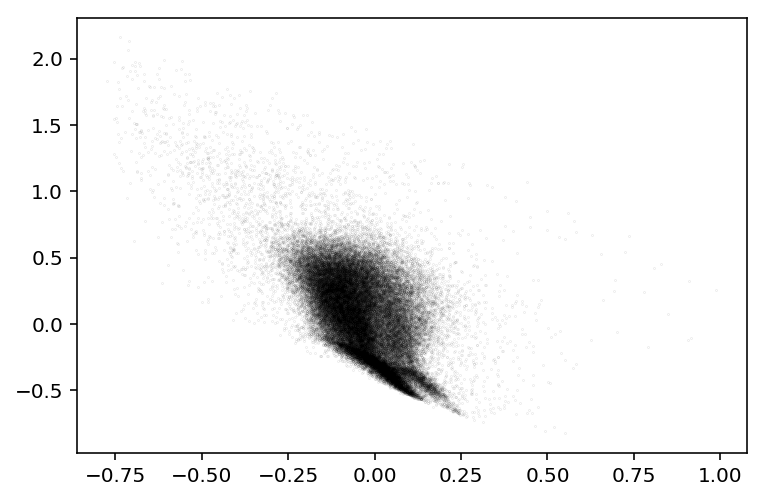

In [31]:
plt.scatter(test_labels[:,3], predictions[:,3]-test_labels[:,3], c='Black', s=0.001)

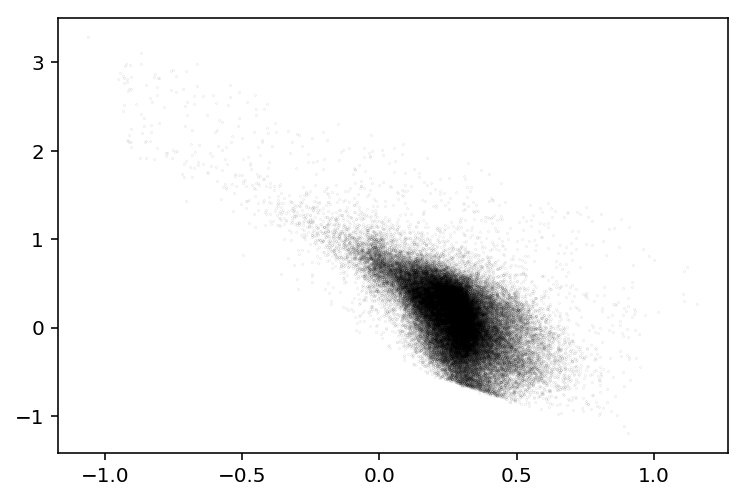

In [32]:
plt.scatter(test_labels[:,4], predictions[:,4]-test_labels[:,4], c='Black', s=0.001)

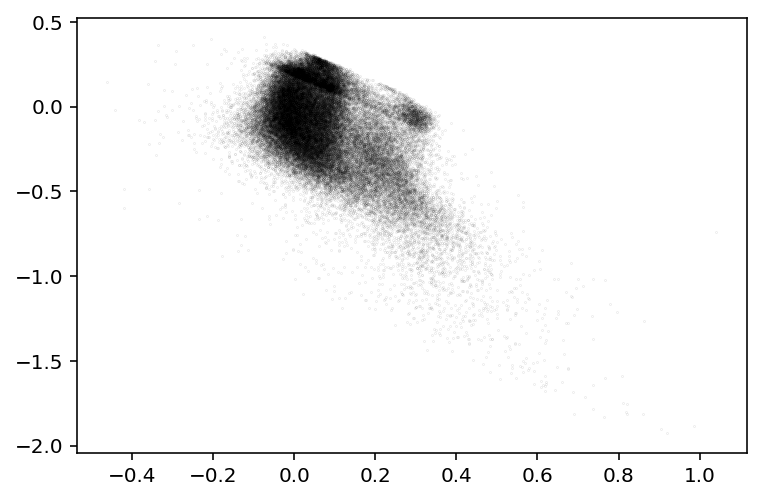

In [33]:
plt.scatter(test_labels[:,5], predictions[:,5]-test_labels[:,5], c='Black', s=0.001)

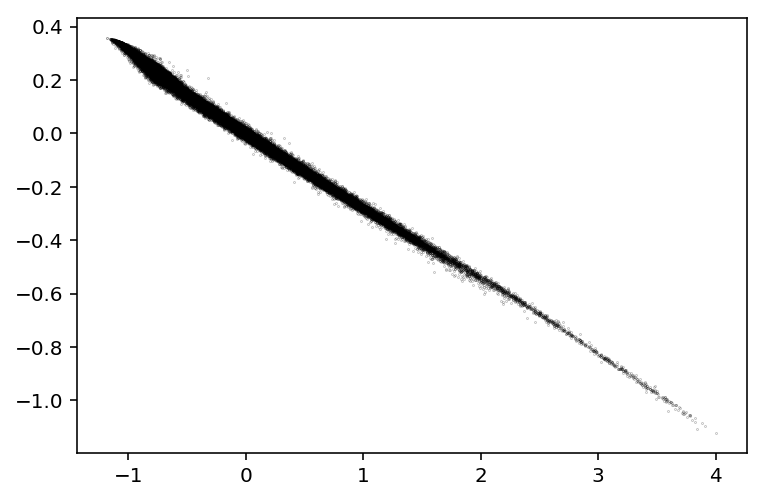

In [34]:
plt.scatter(predictions[:,1], predictions[:,5], s=0.01, c='Black')

(-1.0, 1.0)

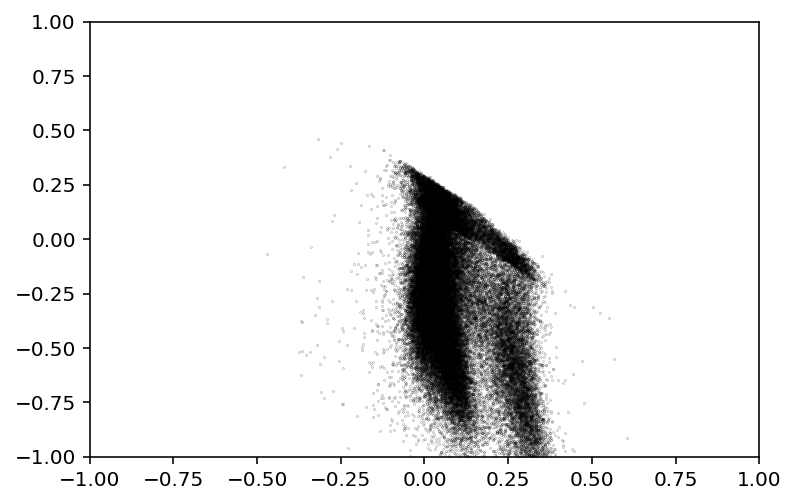

In [37]:
plt.scatter(test_labels[:,6], predictions[:,6]-test_labels[:,6], s=0.01, c='Black')
plt.ylim(-1.,1.)
plt.xlim(-1.,1.)

<function __main__.train_input_fn>